<h1><center></center></h1>
<h1><center><b>Estimation of Obesity Levels Based on Eating Habits and Physical Condition<hr>
</center></h1>


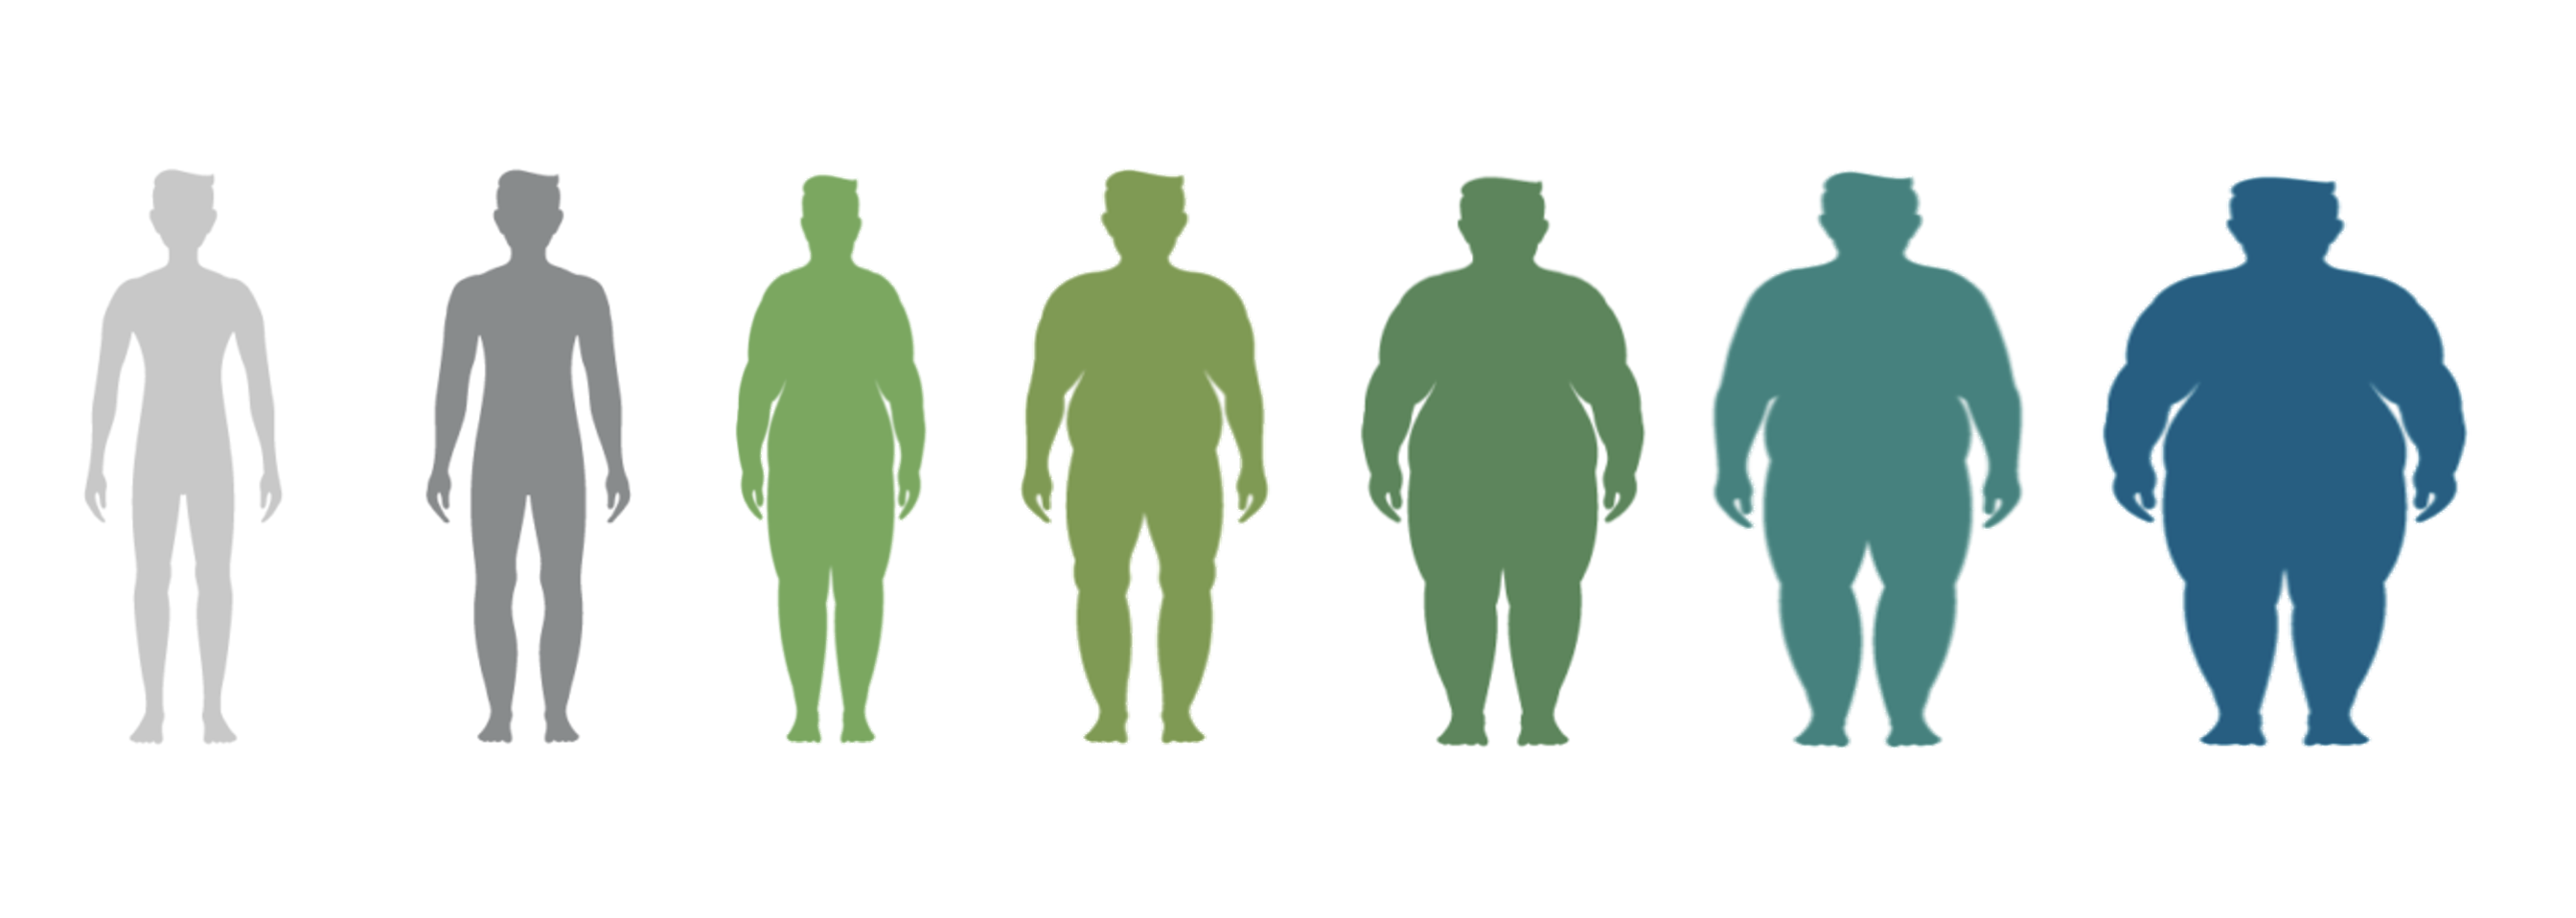

<hr>
<br>

# Table of Contents:
1. <a href='#busund'>Business Understanding</a>

2. <a href='#dataund'>Data Importing and Cleaning</a>
3. <a href='#dataund3'>Exploratory Data Analysis</a>
4. <a href='#dataund4'>Advanced Visualizations and Machine Learning</a>
5. <a href='#dataund5'>Model Evaluation </a>
<br>
<hr>

# **1 | <a id='busund' style="color:#000000;">Business Understanding</a>**

The prevalence of **obesity** has become a global health concern, significantly impacting public health systems and individual well-being. With modern lifestyles marked by sedentary behavior and poor dietary choices, obesity rates have surged, contributing to numerous chronic health conditions such as diabetes, heart disease, and hypertension. Addressing this issue requires effective tools for early **detection** and prevention. In this context, our project aims to develop a **machine learning model** that **estimates obesity** levels based on individuals' eating habits and physical conditions. The goal is to leverage data-driven techniques to create an accurate and reliable system capable of predicting obesity categories. By incorporating factors such as dietary habits, physical activity levels, and other health-related data, the project aspires to contribute to better obesity management and health awareness.

<strong><h3>About Dataset</h3></strong>
<blockquote>
<div class="alert alert-primary" style="margin-top: 20px">
<p>
This dataset, which consists of <strong>2111</strong> records and <strong>17</strong>variables, contains information to assess obesity levels. The class variable <strong>NObeyesdad</strong> (Obesity Level), which is used to designate the records, divides people into several obesity levels:
 </blockquote></p>


*   Insufficient Weight
*   Normal Weight
*   Overweight Level I
*   Overweight Level II
*   Obesity Type I
*   Obesity Type II
*   Obesity Type III

---
<strong><h3>key features</h3></strong>
<blockquote>  

* Gender (Categorical): Biological gender of the individual, as metabolic rates and obesity risks can vary between genders.

* Age (Continuous): Age can impact metabolism and health, making it a crucial factor in obesity estimation.

* Height (Continuous): Height, used with weight to calculate BMI, serves as a fundamental measure in obesity studies.

* Weight (Continuous): Body weight, along with height, is a direct measure used to assess body mass index and obesity levels.

* Family History with Overweight (Binary): This indicates whether an individual has a family history of obesity, offering insight into genetic predispositions.

* FAVC (Binary): Frequency of high-calorie food consumption, which directly impacts caloric intake and potential weight gain.

* FCVC (Continuous): Frequency of vegetable consumption, reflecting healthier dietary habits that help prevent obesity.

* NCP (Continuous): Number of main meals consumed daily, which influences metabolic and energy balance.

* CAEC (Categorical): Food consumption between meals, capturing habits like snacking, which may contribute to weight gain.

* SMOKE (Binary): Indicates if the individual smokes, as smoking habits can affect metabolism and overall health.

* CH2O (Continuous): Daily water intake, with adequate hydration supporting metabolism and healthy body functions.

* SCC (Binary): Whether the individual monitors calorie intake, representing proactive health management behaviors.

* FAF (Continuous): Frequency of physical activity, a major factor in managing weight and overall health.

* TUE (Continuous): Time spent using technology, as sedentary activities like screen time can impact obesity risk.

* CALC (Categorical): Alcohol consumption frequency, which can contribute to excess calorie intake.

* MTRANS (Categorical): Mode of transportation, as more active forms (e.g., walking, cycling) help maintain a healthier lifestyle.</blockquote>
---
<strong><h3>Target Feature</h3></strong>
<blockquote>  
The target feature, <strong>  NObeyesdad </strong>(Categorical), represents the obesity level of individuals, categorized into seven distinct classes. Each class defines a specific range of obesity or weight status, capturing various levels from underweight to severe obesity. This categorical variable is the primary output that the model aims to predict based on the input features, providing a structured way to assess and classify obesity levels across a spectrum.</blockquote>  



# **2 | <a id='dataund' style="color:#000000;">Data Importing and Cleaning</a>**

The data importing and cleaning process is the foundational step to ensure the dataset’s usability for further analysis. In this project, we begin by inspecting the dataset’s structure, identifying data types, and checking for any missing values. Binary and multi-class variables are encoded, while continuous variables are treated for outliers and normalized. This process refines the dataset and prepares it for accurate and reliable modeling.

#####  **Import the necessary libraries**

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import style
from sklearn.metrics import f1_score, confusion_matrix, log_loss, classification_report, matthews_corrcoef, accuracy_score,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#####  **Load data**

In [108]:
df= pd.read_csv("/content/drive/MyDrive/HubbleMind/dataset.csv")

##### **Preview Data**

In [109]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##### **DataFrame Columns**

In [110]:
#different existing variables
df.keys()

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

##### **DataFrame Size**

In [111]:
df.size

35887

##### **DataFrame Shape**

In [112]:
df.shape

(2111, 17)

##### **DataFrame Overview**

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21



```
- The DataFrame has 2,111 entries.
- There are 17 columns in total.
- All columns contain non-null values (no missing data).
- There are 8 numeric columns (float64).
- There are 9 categorical columns (object).
```

##### **Missing Values Count**

In [114]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


##### **Label Encoding**

The binary and categorical columns are label-encoded to prepare the data for machine learning models that cannot process non-numeric data directly. A LabelEncoder is initialized for each categorical column, transforming categories into numeric labels and storing each encoder in a dictionary for easy access. This encoding process is also applied to the target variable, NObeyesdad, ensuring that all relevant categorical data is in numeric form. The code outputs each column's categories, aiding in verifying the encoding mapping and making the data ready for further processing steps.

In [115]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [116]:
# List of binary and categorical columns to encode
binary= ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Initialize the LabelEncoder
label_encoders = {}

# Apply label encoding to specified columns
for col in binary:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    label_encoders[col] = label_encoder
    print(f"{col} classes: {label_encoder.classes_}")
le = LabelEncoder()
df['NObeyesdad'] = le.fit_transform(df['NObeyesdad'])
print(f"{'NObeyesdad'} classes: {le.classes_}")

Gender classes: ['Female' 'Male']
family_history_with_overweight classes: ['no' 'yes']
FAVC classes: ['no' 'yes']
CAEC classes: ['Always' 'Frequently' 'Sometimes' 'no']
SMOKE classes: ['no' 'yes']
SCC classes: ['no' 'yes']
CALC classes: ['Always' 'Frequently' 'Sometimes' 'no']
MTRANS classes: ['Automobile' 'Bike' 'Motorbike' 'Public_Transportation' 'Walking']
NObeyesdad classes: ['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


Insufficient_Weight → 0
Normal_Weight → 1
Obesity_Type_I → 2
Obesity_Type_II → 3
Obesity_Type_III → 4
Overweight_Level_I → 5
Overweight_Level_II → 6

In [117]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


##### **Check for Duplicate Rows**

In the next step, we check for duplicate rows in the dataset to ensure data integrity. Duplicate rows can lead to skewed results and bias in machine learning models. By identifying and removing duplicates, we retain only unique entries, enhancing the dataset's quality and improving the accuracy of the model's performance. This step is crucial for maintaining a clean and reliable dataset.

In [118]:
# Check for duplicate rows in DataFrame 'df'
duplicate_rows = df.duplicated()

# Display the duplicate rows
df[duplicate_rows]


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,0,21.0,1.52,42.0,0,0,3.0,1.0,1,0,1.0,0,0.0,0.0,2,3,0
106,0,25.0,1.57,55.0,0,1,2.0,1.0,2,0,2.0,0,2.0,0.0,2,3,1
174,1,21.0,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,5
179,1,21.0,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,5
184,1,21.0,1.62,70.0,0,1,2.0,1.0,3,0,3.0,0,1.0,0.0,2,3,5
209,0,22.0,1.69,65.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,2,3,1
309,0,16.0,1.66,58.0,0,0,2.0,1.0,2,0,1.0,0,0.0,1.0,3,4,1
460,0,18.0,1.62,55.0,1,1,2.0,3.0,1,0,1.0,0,1.0,1.0,3,3,1
467,1,22.0,1.74,75.0,1,1,3.0,3.0,1,0,1.0,0,1.0,0.0,3,0,1
496,1,18.0,1.72,53.0,1,1,2.0,3.0,2,0,2.0,0,0.0,2.0,2,3,0


In [119]:

df.duplicated().sum()


24

In [120]:
df.drop_duplicates(inplace=True)

In [121]:
df.shape

(2087, 17)

\
```
- The DataFrame initially contained 2,111 entries.
- A total of 24 duplicate rows were identified.
- After removing duplicates, the DataFrame now has 2,087 entries.
```

##### **Detecting Outliers**

Detecting outliers is an essential step in data preprocessing to identify values that deviate significantly from other observations in the dataset. Outliers can impact the model's performance, especially in algorithms sensitive to variations in data distribution.

In [122]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


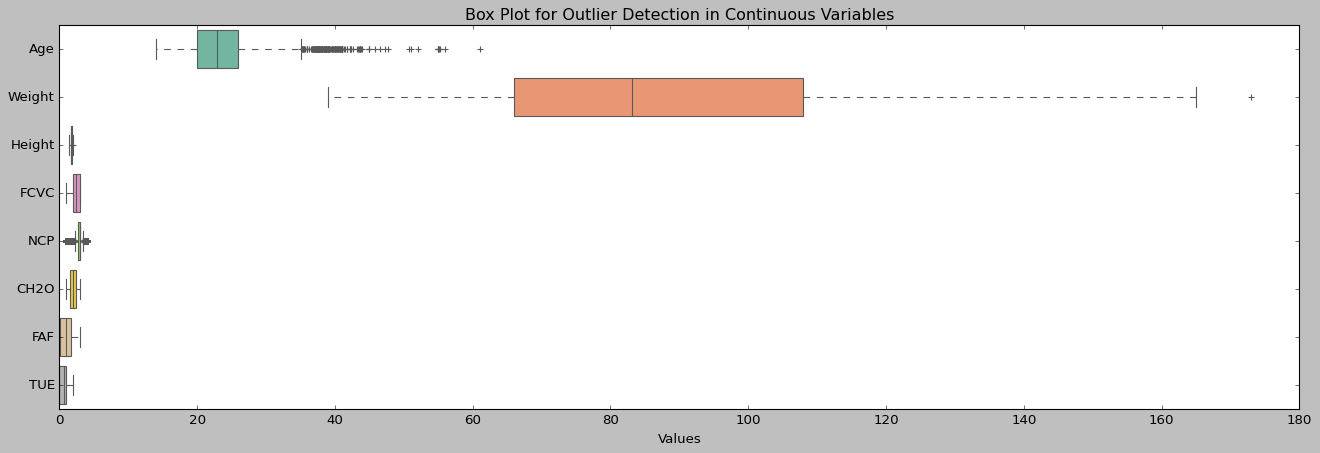

In [123]:
# List of continuous variables
continuous_vars = ['Age','Weight', 'Height',  'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a box plot to visualize outliers for continuous variables only
plt.figure(figsize=(20, 6))

# Use seaborn to draw a box plot for specified continuous variables
sns.boxplot(data=df[continuous_vars], orient="h", palette="Set2")

# Add titles and labels
plt.title("Box Plot for Outlier Detection in Continuous Variables")
plt.xlabel("Values")

# Display the box plot
plt.show()


```
The box plot analysis reveals outliers in the following columns:
  - Age: Indicates unusually young or old participants.
  - Height: Reflects individuals with extreme height measurements.
  - Weight: Suggests individuals with atypically high or low weights.
  - NCP: Shows irregular meal frequencies.
Addressing these outliers is important, as they can distort analysis results and affect overall findings.

```

##### **Handling Outliers**

The **cap_outliers** function is designed to identify and handle outliers in a specified column of a DataFrame using the Interquartile Range (IQR) method. It first calculates the first (Q1) and third (Q3) quartiles of the data to determine the IQR, which represents the middle 50% of the dataset. The function then defines lower and upper bounds as 1.5 times the IQR below Q1 and above Q3, respectively. Any values in the column that fall below the lower bound or above the upper bound are replaced with these bounds, effectively capping the outliers. This approach helps to reduce the influence of extreme values on statistical analyses while preserving the integrity of the dataset.

In [124]:
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Calculate the first quartile
    Q3 = data[column].quantile(0.75)  # Calculate the third quartile
    IQR = Q3 - Q1                      # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR       # Calculate lower bound
    upper_bound = Q3 + 1.5 * IQR       # Calculate upper bound
    # Cap the outliers
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data

# List of columns to cap for outliers
columns_to_cap = ['Age', 'Height', 'Weight', 'NCP']

# Apply the capping function directly to the original DataFrame
for col in columns_to_cap:
    df = cap_outliers(df, col)

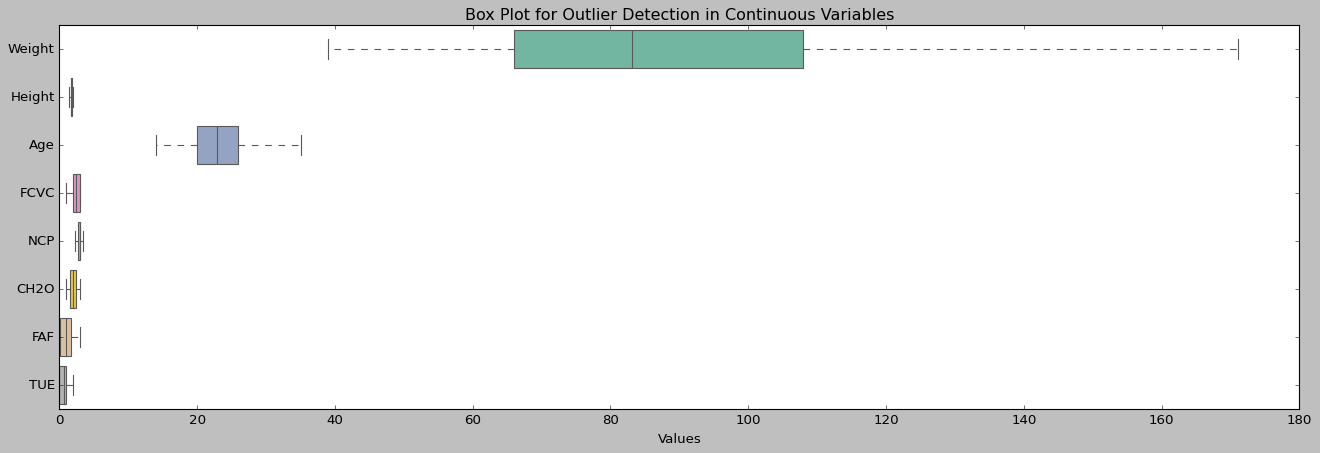

In [125]:
# List of continuous variables
continuous_vars = ['Weight', 'Height', 'Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Create a box plot to visualize outliers for continuous variables only
plt.figure(figsize=(20, 6))

# Use seaborn to draw a box plot for specified continuous variables
sns.boxplot(data=df[continuous_vars], orient="h", palette="Set2")

# Add titles and labels
plt.title("Box Plot for Outlier Detection in Continuous Variables")
plt.xlabel("Values")

# Display the box plot
plt.show()

##### **Normalization**

Normalization is the final step in the preprocessing process that transforms continuous variables into a standard range, making the data more suitable for analysis and modeling. In this project, we employ Min-Max scaling to normalize features such as Age, Weight, and Height. This method rescales the data to a fixed range, typically between 0 and 1, preserving the relationships between values while reducing the influence of outliers. By normalizing these variables, we enhance the model's convergence speed and overall performance, enabling more accurate predictions of obesity levels based on individual eating habits and physical conditions.

In [126]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.000000,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.000000,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.000000,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.000000,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,2.243667,2,0,2.0,0,0.0,0.0,2,3,6


In [127]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the specified continuous columns
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

In [128]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,0.331344,0.321689,0.189337,1,0,0.5,0.625,2,0,0.5,0,0.000000,0.5,3,3,1
1,0,0.331344,0.132460,0.128749,1,0,1.0,0.625,2,1,1.0,1,1.000000,0.0,2,3,1
2,1,0.426013,0.662301,0.287792,1,0,0.5,0.625,2,0,0.5,0,0.666667,0.5,1,3,1
3,1,0.615353,0.662301,0.363527,0,0,1.0,0.625,2,0,0.5,0,0.666667,0.0,1,4,5
4,1,0.378679,0.624455,0.384733,0,0,0.5,0.000,2,0,0.5,0,0.000000,0.0,2,3,6


# **3 | <a id='dataund3' style="color:#000000;">Exploratory Data Analysis</a>**

In [28]:
dfv= pd.read_csv("/content/drive/MyDrive/HubbleMind/dataset.csv")

##### **Summary Statistics for Continuous Variables**

In [ ]:
dfv[continuous_vars].describe()

,Weight,Height,Age,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,86.586058,1.701677,24.312600,2.419043,2.685628,2.008011,1.010298,0.657866
std,26.191172,0.093305,6.345968,0.533927,0.778039,0.612953,0.850592,0.608927
min,39.000000,1.450000,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,65.473343,1.630000,19.947192,2.000000,2.658738,1.584812,0.124505,0.000000
50%,83.000000,1.700499,22.777890,2.385502,3.000000,2.000000,1.000000,0.625350
75%,107.430682,1.768464,26.000000,3.000000,3.000000,2.477420,1.666678,1.000000
max,173.000000,1.980000,61.000000,3.000000,4.000000,3.000000,3.000000,2.000000


* The dataset shows a diverse range of weights, heights, and ages, which could impact the analysis of obesity levels.
* The variability in dietary habits (FCVC, NCP, CH2O) suggests differing approaches to nutrition among individuals, which may correlate with obesity levels.
* The low average frequency of physical activity (FAF) indicates a potential area for public health intervention, as increased activity could mitigate obesity risk.
* The younger age distribution may influence the analysis of obesity levels, as younger individuals might have different lifestyle habits compared to older adults.

##### **Target Distribution**

Text(0.5, 1.0, 'NObeyesdad Distribution')

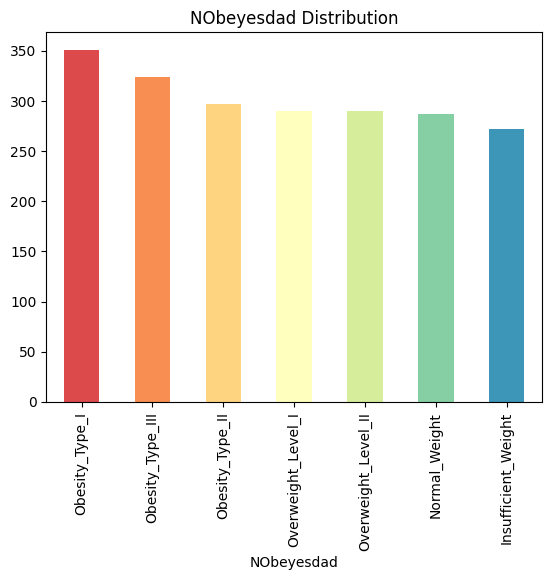

In [ ]:
custom_palette = sns.color_palette("Spectral", len(dfv['NObeyesdad'].value_counts()))
dfv['NObeyesdad'].value_counts().plot(kind="bar", color=custom_palette)
plt.title("NObeyesdad Distribution")

Text(0.5, 1.0, 'Distribution of NObeyesdad')

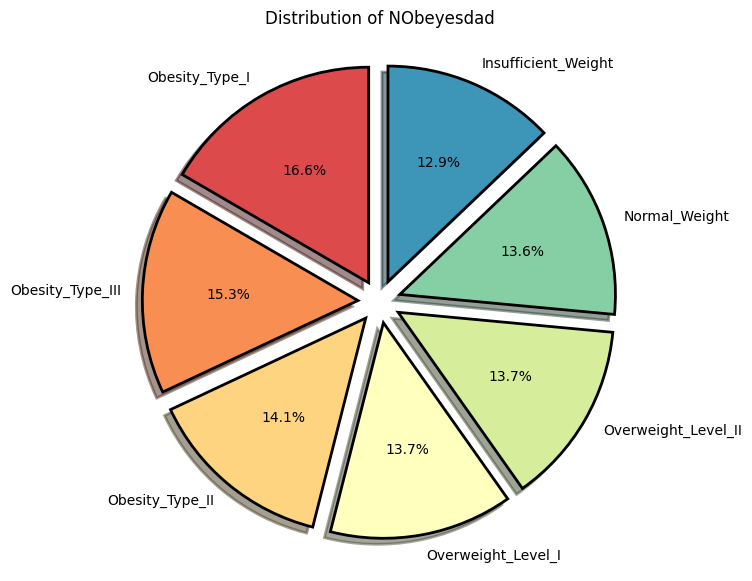

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = custom_palette
wp = {'linewidth':2, 'edgecolor':'black'}
tags = dfv['NObeyesdad'].value_counts()
explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of NObeyesdad')

The target distribution of obesity levels in our dataset is balanced, with each class of the NObeyesdad variable represented fairly evenly. This balance is essential for effective model training, as it minimizes bias towards any particular class and enhances the model's ability to generalize. A balanced dataset contributes to more accurate predictions and reliable insights into the relationship between eating habits, physical conditions, and obesity levels.

##### **Distribution of categorical variables**

<ipython-input-65-3441e3fcc68d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-65-3441e3fcc68d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-65-3441e3fcc68d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=dfv, x=col,  palette='Spectral')
<ipython-input-65-3441e3fcc68d>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

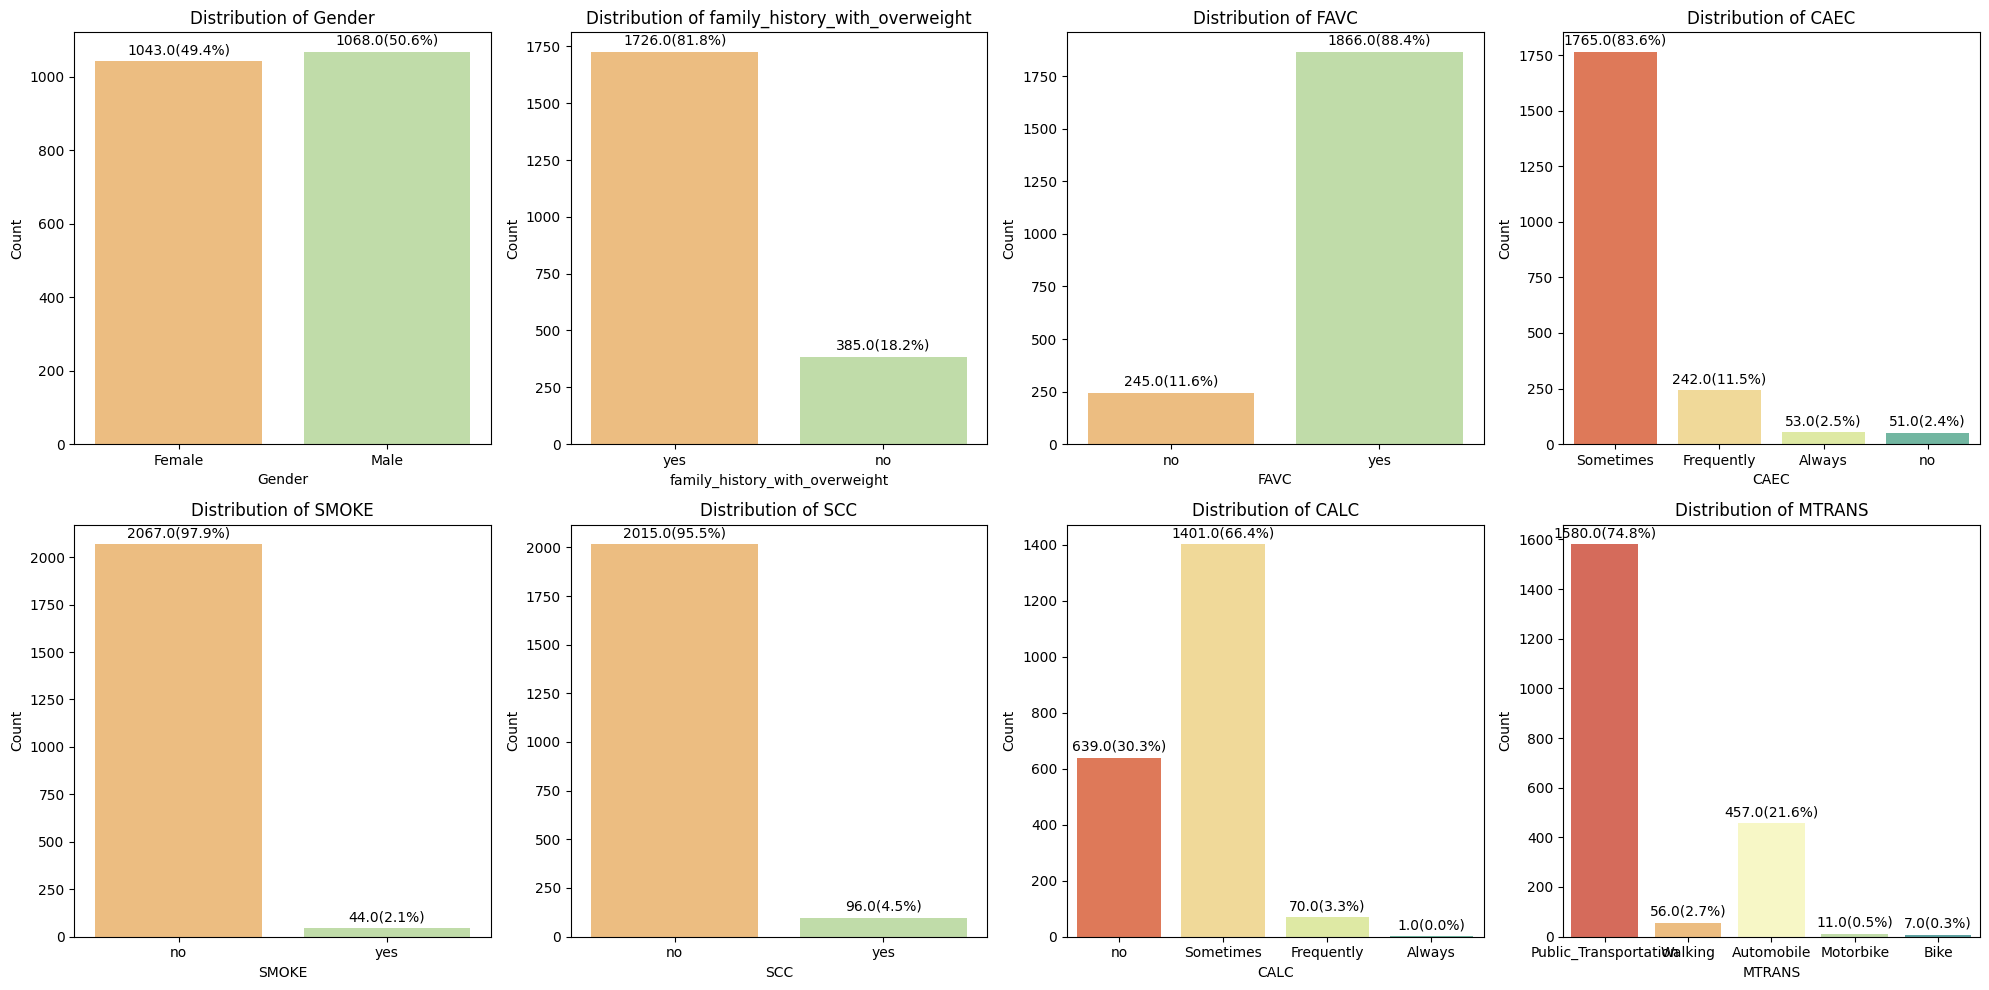

In [ ]:
# List of categorical variables
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Set the figure size
plt.figure(figsize=(20, 10))

# Create subplots for each categorical variable
n_columns = 4
n_rows = (len(categorical_vars) + n_columns - 1) // n_columns  # Calculate the number of rows needed

for i, col in enumerate(categorical_vars):
    # Create subplot for each variable
    plt.subplot(n_rows, n_columns, i + 1)  # Update to n_rows and n_columns

    # Plot countplot for the categorical variable
    ax = sns.countplot(data=dfv, x=col,  palette='Spectral')

    # Add titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Total count for percentage calculation
    total_count = len(dfv)

    # Exact count and percentage labels on top of the bars
    for p in ax.patches:  # Iterate through the bars
        height = p.get_height()
        percentage = (height / total_count) * 100
        ax.annotate(f'{height}({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline',
                    fontsize=10,
                    color='black',
                    xytext=(0, 5),  # Offset the text slightly above the bar
                    textcoords='offset points')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


* **Gender Distribution:** The dataset shows a balanced gender distribution with 49.4% female and 50.6% male participants.
* **Family History of Overweight:** A significant 81.8% of individuals reported having a family member suffering from overweight, indicating a potential genetic or environmental influence on weight.
* **Physical Activity:** The majority of participants (88.4%) engage in physical activity, which is a positive factor for maintaining a healthy weight.
* **Food Consumption Habits:** 83.6% of respondents consume food between meals sometimes, suggesting a common behavior that could impact dietary habits.
* **Smoking Status:** An overwhelming 97.9% of participants do not smoke, which is beneficial for overall health and weight management.
* **Monitoring Caloric Intake:** A large majority (95.5%) do not monitor their caloric intake, indicating a potential area for nutritional education.
* **Alcohol Consumption:** 99.4% of participants consume alcohol sometimes, pointing to a prevalent social drinking culture.
* **Public Transport Usage:** Finally, 74.8% of individuals rely on public transportation, which may reflect lifestyle choices related to activity levels.

##### **Distribution of continuous variables**

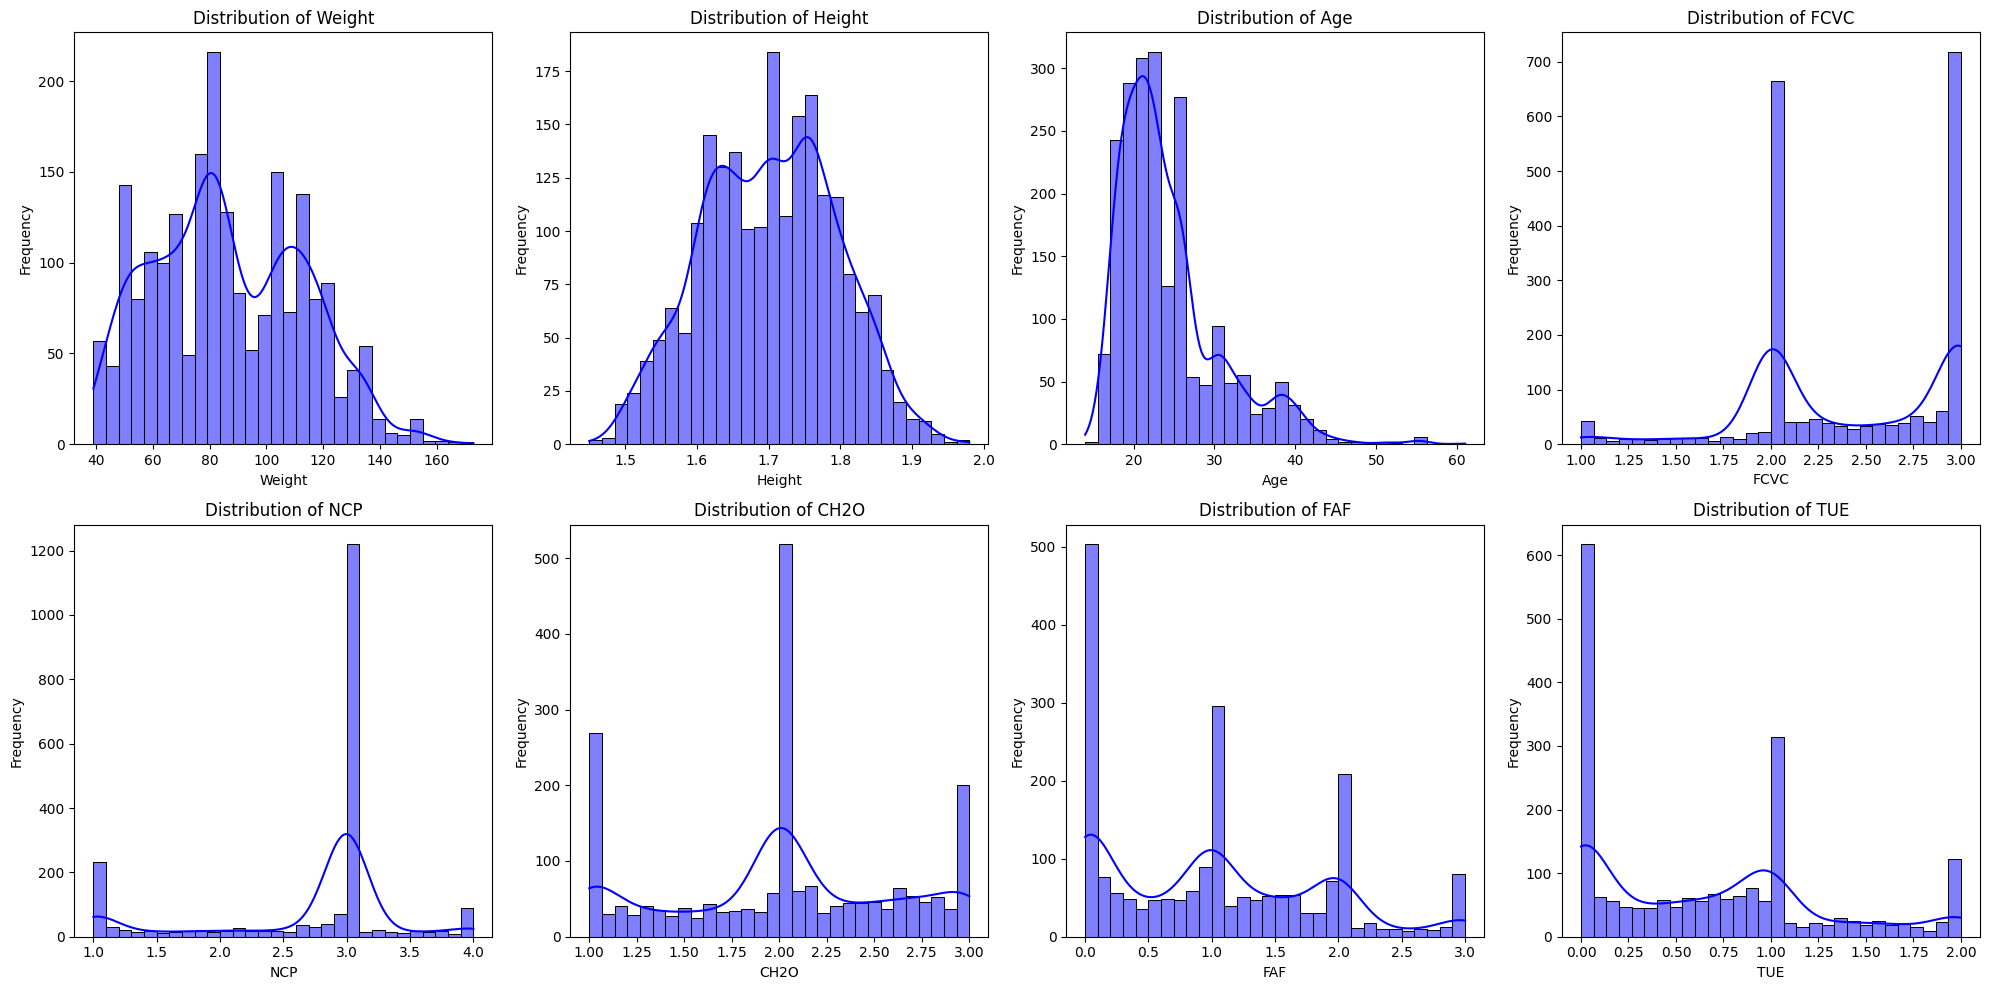

In [29]:
plt.figure(figsize=(20, 10))  # Adjust the figure size if necessary

# Create subplots
n_columns = 4
n_rows = (len(continuous_vars) + n_columns - 1) // n_columns  # Calculate the number of rows needed

for i, col in enumerate(continuous_vars):
    # Create subplot for each variable
    plt.subplot(n_rows, n_columns, i + 1)  # Update to n_rows and n_columns

    # Plot histogram with KDE (density plot)
    sns.histplot(dfv[col], kde=True, color='blue', bins=30)

    # Add titles and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout
plt.tight_layout()

# Show the plots

plt.show()

##### **Boxplots**

<ipython-input-66-523c985e3df9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='Weight', data=dfv, palette='Spectral')
<ipython-input-66-523c985e3df9>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='NObeyesdad', y='FAF', data=dfv, palette='Set3')


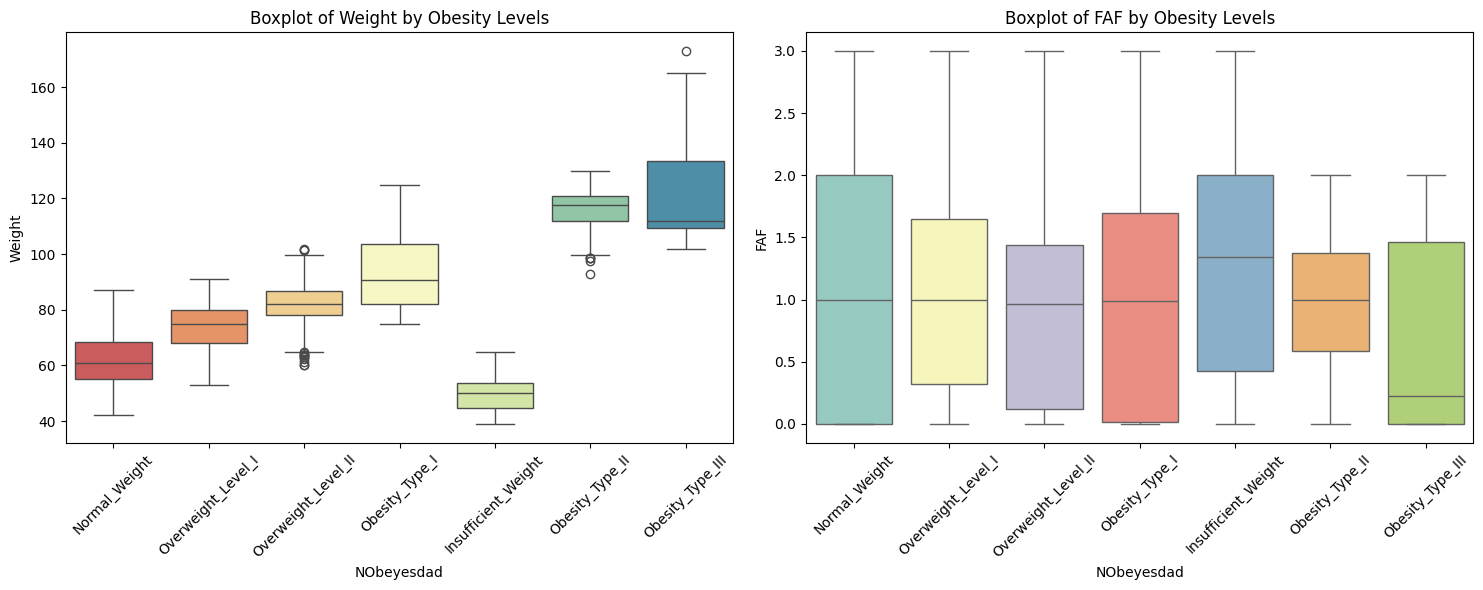

In [ ]:
# Set the figure size for better readability
plt.figure(figsize=(15, 6))

# Create a boxplot for 'Weight' by obesity levels
plt.subplot(1, 2, 1)
sns.boxplot(x='NObeyesdad', y='Weight', data=dfv, palette='Spectral')
plt.title('Boxplot of Weight by Obesity Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Create a boxplot for 'FAF' (Frequency of physical activity) by obesity levels
plt.subplot(1, 2, 2)
sns.boxplot(x='NObeyesdad', y='FAF', data=dfv, palette='Set3')
plt.title('Boxplot of FAF by Obesity Levels')
plt.xticks(rotation=45)

# Show the plots
plt.tight_layout()
plt.show()


##### **Correlation matrix**

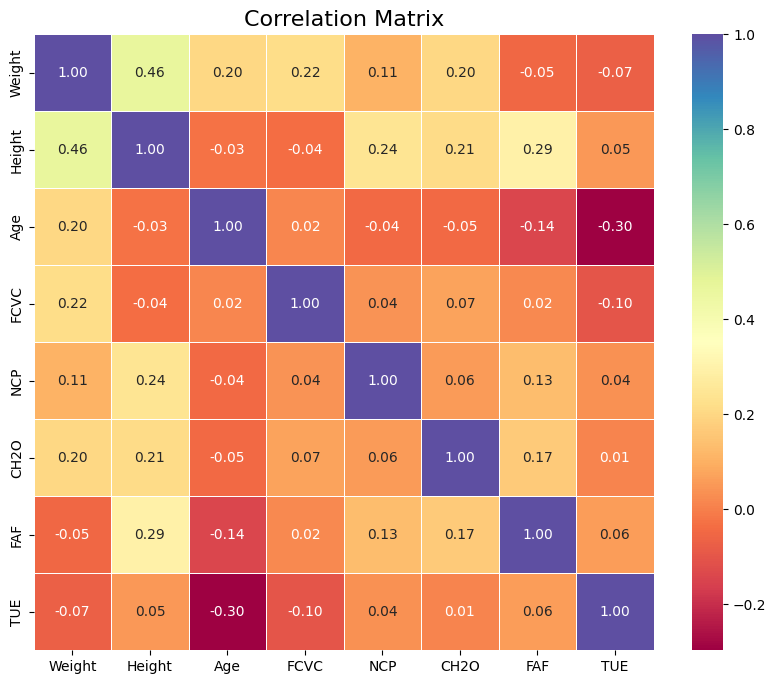

In [30]:
# Compute the correlation matrix for the continuous variables
corr_matrix = dfv[continuous_vars].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt='.2f', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# **4 | <a id='dataund4' style="color:#000000;">Advanced Visualizations and Machine Learning</a>**

##### **Variation of obesity according to Weight and Height**

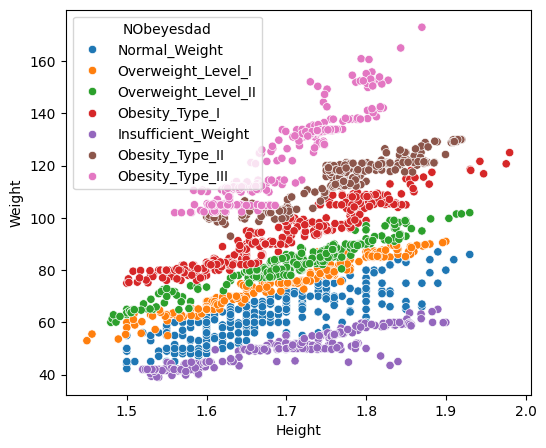

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Height', y='Weight',data=dfv, hue = 'NObeyesdad')
plt.show()

##### **Variation of obesity according to Weight and Age**

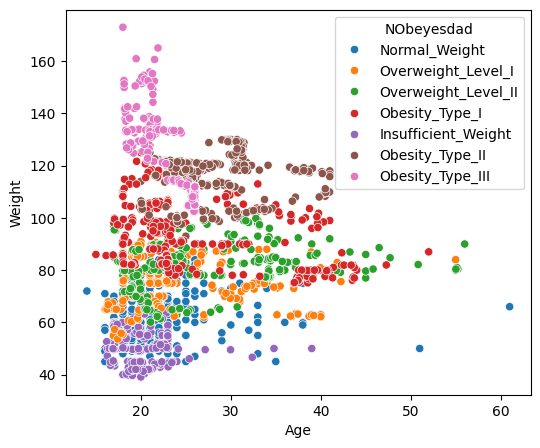

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Weight',data=dfv, hue = 'NObeyesdad')
plt.show()

##### **Distribution of categorical variables by Obesity Levels**

In [ ]:
# Create subplots to hold the plots for each variable
for col in categorical_vars:
    # Create a countplot for each categorical variable
    fig = px.histogram(dfv,
                       x=col,
                       color='NObeyesdad',  # Use NObeyesdad for hue
                       barmode='group',
                       title=f'Distribution of {col} by NObeyesdad',
                       labels={'NObeyesdad': 'Obesity Levels'},
                       text_auto=True)  # Enable text to show counts on hover

    # Update layout for better aesthetics
    fig.update_traces(texttemplate='', textposition='outside')
    fig.update_layout(xaxis_title=col, yaxis_title='Count')

    # Show the interactive plot
    fig.show()

##### **X-y Split**

In [129]:
# Define features and target variable
X = df.drop(columns=['NObeyesdad'])  # Features (drop target column)
y = df['NObeyesdad']  # Target variable

##### **Feature Engineering and Scaling**

In [79]:
scalerS = StandardScaler()

# Apply scaler to the specified continuous columns
X[continuous_vars]= scalerS.fit_transform(df[continuous_vars])

After testing various models, only Logistic Regression and Support Vector Classifier (SVC) delivered strong performance, especially when combined with data standardization through StandardScaler().

##### **Train-Test Split**

In [130]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Models Implementation**

###### **1 |  Logistic Regression**

In [81]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_train_pred_LR = LR.predict(X_train)
y_test_pred_LR= LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### **2 |  SVC**

In [82]:
SVC = SVC(probability=True)
SVC.fit(X_train, y_train)
y_train_pred_SVC = SVC.predict(X_train)
y_test_pred_SVC= SVC.predict(X_test)

###### **3 |  Decision Tree**

In [57]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_train_pred_DT = DT.predict(X_train)
y_test_pred_DT= DT.predict(X_test)

###### **4 | Naive Bayes**

In [58]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_train_pred_NB = NB.predict(X_train)
y_test_pred_NB= NB.predict(X_test)

###### **5 | Hard Voting Classifier**

In [59]:
# Ensemble of Models
estimator = []
estimator.append(('LR ', LogisticRegression()))
estimator.append(('clf',MultinomialNB()))
estimator.append(('DT', DecisionTreeClassifier()))

In [60]:
# Voting Classifier with hard voting
hard_voting = VotingClassifier(estimators = estimator, voting ='hard')
hard_voting.fit(X_train, y_train)
y_train_pred_hv = hard_voting.predict(X_train)
y_test_pred_hv= hard_voting.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### **6 | Random Forest**

In [61]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF= RF.predict(X_test)

###### **7 | XGBoost**

In [62]:
# Creating the model
xgb = XGBClassifier()
# Training the model
xgb.fit(X_train, y_train)
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb= xgb.predict(X_test)

# **5 | <a id='dataund5' style="color:#000000;">Model Evaluation</a>**

In [131]:
# Create an empty DataFrame to store the values
compa = pd.DataFrame(columns=['Model', 'Accuracy - Train', 'Accuracy - Test', 'MCC', 'F1'])

def metrics(model, y_train_pred, y_test_pred, y_train, y_test):
    global compa  # Use the global DataFrame to update it
    # Calculate accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Display results
    print("Accuracy - Train:", train_accuracy)
    print("Accuracy - Test:", test_accuracy)

    # Calculate and display the MCC (Matthews Correlation Coefficient)
    mcc = matthews_corrcoef(y_test, y_test_pred)
    print("MCC:", mcc)

    # Calculate the F1 score
    f1 = f1_score(y_test, y_test_pred, average='macro')
    print('F1:', f1)

    # Create a new row of results as a DataFrame
    new_row = pd.DataFrame({
        'Model': [model.__class__.__name__],  # Model name used
        'Accuracy - Train': [train_accuracy],
        'Accuracy - Test': [test_accuracy],
        'MCC': [mcc],
        'F1': [f1]
    })

    # Add the new row to the DataFrame `compa` using `concat`
    compa = pd.concat([compa, new_row], ignore_index=True)



# Function to display the confusion matrix
def plot_confusion_matrix(model, y_test, y_test_pred):
    # Display the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(confusion_mat)
    style.use('classic')
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

# Function to display the classification report
def print_classification_report(y_test, y_test_pred):
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:\n', report)

###### **1 |  Logistic Regression**

In [83]:
metrics(LR, y_train_pred_LR, y_test_pred_LR,y_train,y_test)

Accuracy - Train: 0.8945476333133613
Accuracy - Test: 0.8660287081339713
MCC: 0.8450304439096882
F1: 0.8557742333617542


Confusion Matrix:
[[56  3  0  0  0  0  0]
 [12 38  0  0  0  9  2]
 [ 0  0 66  2  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  2  0  0  0 38 15]
 [ 0  0  3  1  0  5 40]]


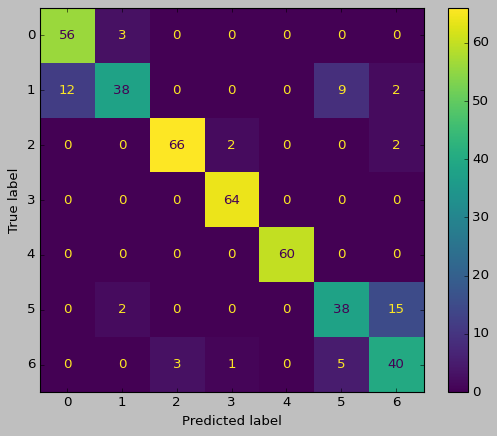

In [84]:
plot_confusion_matrix(LR,y_test, y_test_pred_LR)

In [85]:
print_classification_report(y_test, y_test_pred_LR)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        59
           1       0.88      0.62      0.73        61
           2       0.96      0.94      0.95        70
           3       0.96      1.00      0.98        64
           4       1.00      1.00      1.00        60
           5       0.73      0.69      0.71        55
           6       0.68      0.82      0.74        49

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.86       418



###### **2 |  SVC**

In [86]:
metrics(SVC, y_train_pred_SVC, y_test_pred_SVC,y_train,y_test)

Accuracy - Train: 0.9460754943079689
Accuracy - Test: 0.8995215311004785
MCC: 0.8828686859410444
F1: 0.8946172203841964


Confusion Matrix:
[[52  7  0  0  0  0  0]
 [ 5 45  0  0  0 10  1]
 [ 0  0 68  0  0  1  1]
 [ 0  0  1 63  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  3  1  0  0 43  8]
 [ 0  0  1  0  0  3 45]]


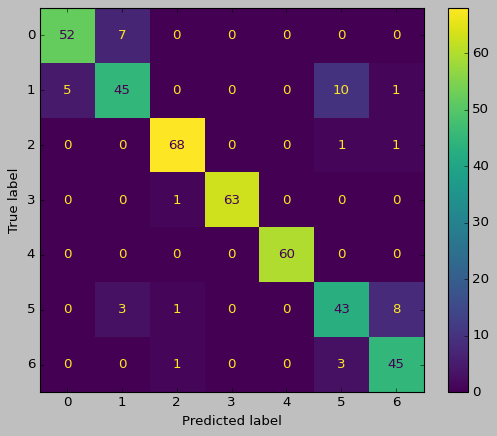

In [87]:
plot_confusion_matrix(SVC,y_test, y_test_pred_SVC)

In [88]:
print_classification_report(y_test, y_test_pred_SVC)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        59
           1       0.82      0.74      0.78        61
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        64
           4       1.00      1.00      1.00        60
           5       0.75      0.78      0.77        55
           6       0.82      0.92      0.87        49

    accuracy                           0.90       418
   macro avg       0.89      0.90      0.89       418
weighted avg       0.90      0.90      0.90       418



###### **3 |  Decision Tree**

In [64]:
metrics(DT, y_train_pred_DT, y_test_pred_DT,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 0.9186602870813397
MCC: 0.9052355567486199
F1: 0.9165402899959464


<ipython-input-63-ffc226aaef28>:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  compa = pd.concat([compa, new_row], ignore_index=True)


Confusion Matrix:
[[56  3  0  0  0  0  0]
 [ 6 43  0  0  0 12  0]
 [ 0  0 67  1  0  0  2]
 [ 0  0  1 63  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  7  1  0  0 47  0]
 [ 0  0  1  0  0  0 48]]


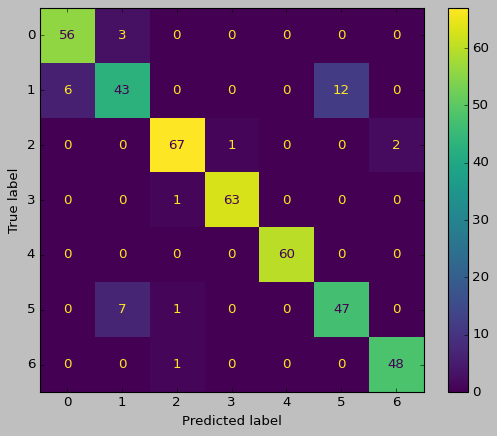

In [65]:
plot_confusion_matrix(DT,y_test, y_test_pred_DT)

In [66]:
print_classification_report(y_test, y_test_pred_DT)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        59
           1       0.81      0.70      0.75        61
           2       0.96      0.96      0.96        70
           3       0.98      0.98      0.98        64
           4       1.00      1.00      1.00        60
           5       0.80      0.85      0.82        55
           6       0.96      0.98      0.97        49

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



###### **4 | Naive Bayes**

In [67]:
metrics(NB, y_train_pred_NB, y_test_pred_NB,y_train,y_test)

Accuracy - Train: 0.43678849610545234
Accuracy - Test: 0.41866028708133973
MCC: 0.3357858765957124
F1: 0.3769630574795553


Confusion Matrix:
[[20  6 13  1 17  2  0]
 [ 7 13 10  5 20  2  4]
 [ 0  2 37  8 22  0  1]
 [ 0  0 32 32  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  2 27  4 12  8  2]
 [ 0  1 22  7 14  0  5]]


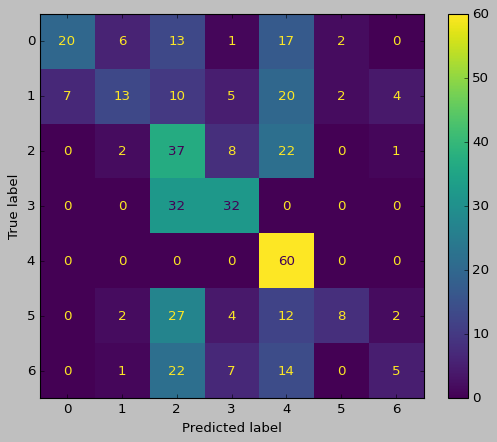

In [68]:
plot_confusion_matrix(NB,y_test, y_test_pred_NB)

In [69]:
print_classification_report(y_test, y_test_pred_NB)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.34      0.47        59
           1       0.54      0.21      0.31        61
           2       0.26      0.53      0.35        70
           3       0.56      0.50      0.53        64
           4       0.41      1.00      0.59        60
           5       0.67      0.15      0.24        55
           6       0.42      0.10      0.16        49

    accuracy                           0.42       418
   macro avg       0.51      0.40      0.38       418
weighted avg       0.51      0.42      0.38       418



###### **5 | Hard Voting Classifier**

In [70]:
metrics(hard_voting, y_train_pred_hv, y_test_pred_hv,y_train,y_test)

Accuracy - Train: 0.811264230077891
Accuracy - Test: 0.7918660287081339
MCC: 0.7592474916803785
F1: 0.779550152001575


Confusion Matrix:
[[50  7  0  0  0  2  0]
 [23 32  0  0  0  3  3]
 [ 0  2 64  2  1  0  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  9 13  1  0 30  2]
 [ 0  2 13  1  2  0 31]]


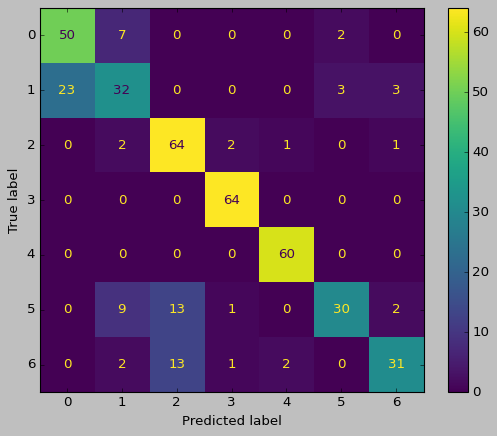

In [71]:
plot_confusion_matrix(hard_voting,y_test, y_test_pred_hv)

In [72]:
print_classification_report(y_test, y_test_pred_hv)

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.85      0.76        59
           1       0.62      0.52      0.57        61
           2       0.71      0.91      0.80        70
           3       0.94      1.00      0.97        64
           4       0.95      1.00      0.98        60
           5       0.86      0.55      0.67        55
           6       0.84      0.63      0.72        49

    accuracy                           0.79       418
   macro avg       0.80      0.78      0.78       418
weighted avg       0.80      0.79      0.78       418




###### **6 | Random Forest**

In [73]:
metrics(RF, y_train_pred_RF, y_test_pred_RF,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 0.9617224880382775
MCC: 0.9553028534725408
F1: 0.9609493876335939


Confusion Matrix:
[[56  3  0  0  0  0  0]
 [ 2 56  0  0  0  3  0]
 [ 0  0 68  0  0  0  2]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  4  0  0  0 51  0]
 [ 0  1  1  0  0  0 47]]


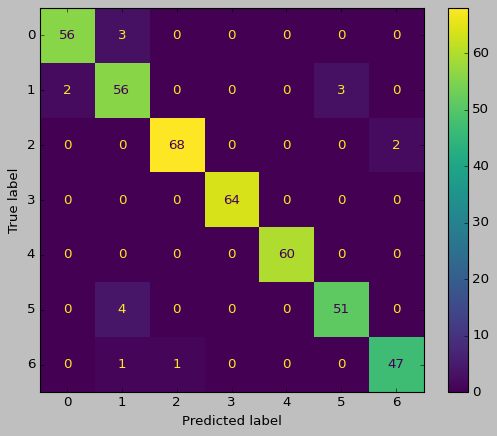

In [74]:
plot_confusion_matrix(RF,y_test, y_test_pred_RF)

In [75]:
print_classification_report(y_test, y_test_pred_RF)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.88      0.92      0.90        61
           2       0.99      0.97      0.98        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.94      0.93      0.94        55
           6       0.96      0.96      0.96        49

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



###### **7 | XGBoost**

In [76]:
metrics(xgb, y_train_pred_xgb, y_test_pred_xgb,y_train,y_test)

Accuracy - Train: 1.0
Accuracy - Test: 0.9665071770334929
MCC: 0.9609167731741706
F1: 0.965866584261784


Confusion Matrix:
[[56  3  0  0  0  0  0]
 [ 4 53  0  0  0  4  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  0 64  0  0  0]
 [ 0  0  0  0 60  0  0]
 [ 0  2  0  0  0 53  0]
 [ 0  0  0  0  0  0 49]]


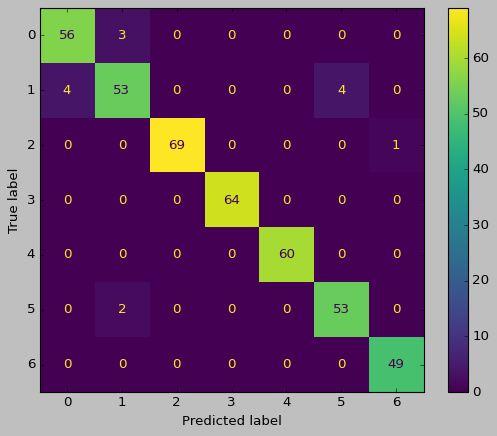

In [77]:
plot_confusion_matrix(xgb,y_test, y_test_pred_xgb)

In [78]:
print_classification_report(y_test, y_test_pred_xgb)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        59
           1       0.91      0.87      0.89        61
           2       1.00      0.99      0.99        70
           3       1.00      1.00      1.00        64
           4       1.00      1.00      1.00        60
           5       0.93      0.96      0.95        55
           6       0.98      1.00      0.99        49

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



##### **Models Comparison**

In [89]:
compa.sort_values(by='MCC', ascending=False)

,Model,Accuracy - Train,Accuracy - Test,MCC,F1
4,XGBClassifier,1.000000,0.966507,0.960917,0.965867
3,RandomForestClassifier,1.000000,0.961722,0.955303,0.960949
0,DecisionTreeClassifier,1.000000,0.918660,0.905236,0.916540
6,SVC,0.946075,0.899522,0.882869,0.894617
5,LogisticRegression,0.894548,0.866029,0.845030,0.855774
2,VotingClassifier,0.811264,0.791866,0.759247,0.779550
1,MultinomialNB,0.436788,0.418660,0.335786,0.376963


##### **Testing the Model with New Data Examples**

In [152]:
# Example of new input data (update with actual data you want to predict)
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Age': [26.0],
    'Height': [1.62],
    'Weight': [90],
    'family_history_with_overweight': ['no'],
    'FAVC': ['no'],
    'FCVC': [2.0],
    'NCP': [3.0],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2.0],
    'SCC': ['no'],
    'FAF': [0.0],
    'TUE': [1.0],
    'CALC': ['no'],
    'MTRANS': ['Public_Transportation']
})

# Print the input data as a characteristics list
print("-----------Input characteristics for prediction:----------")
for column in new_data.columns:
    print(f"{column}: {new_data[column][0]}")

# 1. Label encode categorical variables (use the same encoding as in training)
# Iterate over each categorical column and encode it
for col in binary:
    new_data[col] = label_encoders[col].transform(new_data[col])

# 2. Apply MinMaxScaler to continuous variables (ensure you used the same scaler during training)
# Scale continuous variables
new_data[continuous_vars] = scaler.transform(new_data[continuous_vars])

# 3. Predict using your trained model
prediction = xgb.predict(new_data)

# Display the prediction result
print(f"------------The prediction for the new data is: {prediction[0]}--------")

# Decode the prediction to get the corresponding label
decoded_prediction = le.inverse_transform([prediction[0]])
print(f"------------The decoded prediction for the new data -----\n {decoded_prediction[0]}")
print(f"---------------------------------------------------------")


-----------Input characteristics for prediction:----------
Gender: Female
Age: 26.0
Height: 1.62
Weight: 90
family_history_with_overweight: no
FAVC: no
FCVC: 2.0
NCP: 3.0
CAEC: Sometimes
SMOKE: no
CH2O: 2.0
SCC: no
FAF: 0.0
TUE: 1.0
CALC: no
MTRANS: Public_Transportation
------------The prediction for the new data is: 2--------
------------The decoded prediction for the new data -----
 Obesity_Type_I
---------------------------------------------------------


In [153]:
# Example of new input data (update with actual data you want to predict)
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Age': [26.0],
    'Height': [1.62],
    'Weight': [60],
    'family_history_with_overweight': ['no'],
    'FAVC': ['no'],
    'FCVC': [2.0],
    'NCP': [3.0],
    'CAEC': ['Sometimes'],
    'SMOKE': ['no'],
    'CH2O': [2.0],
    'SCC': ['no'],
    'FAF': [0.0],
    'TUE': [1.0],
    'CALC': ['no'],
    'MTRANS': ['Public_Transportation']
})

# Print the input data as a characteristics list
print("-----------Input characteristics for prediction:----------")
for column in new_data.columns:
    print(f"{column}: {new_data[column][0]}")

# 1. Label encode categorical variables (use the same encoding as in training)
# Iterate over each categorical column and encode it
for col in binary:
    new_data[col] = label_encoders[col].transform(new_data[col])

# 2. Apply MinMaxScaler to continuous variables (ensure you used the same scaler during training)
# Scale continuous variables
new_data[continuous_vars] = scaler.transform(new_data[continuous_vars])

# 3. Predict using your trained model
prediction = xgb.predict(new_data)

# Display the prediction result
print(f"------------The prediction for the new data is: {prediction[0]}--------")

# Decode the prediction to get the corresponding label
decoded_prediction = le.inverse_transform([prediction[0]])
print(f"------------The decoded prediction for the new data -----\n {decoded_prediction[0]}")
print(f"---------------------------------------------------------")

-----------Input characteristics for prediction:----------
Gender: Female
Age: 26.0
Height: 1.62
Weight: 60
family_history_with_overweight: no
FAVC: no
FCVC: 2.0
NCP: 3.0
CAEC: Sometimes
SMOKE: no
CH2O: 2.0
SCC: no
FAF: 0.0
TUE: 1.0
CALC: no
MTRANS: Public_Transportation
------------The prediction for the new data is: 1--------
------------The decoded prediction for the new data -----
 Normal_Weight
---------------------------------------------------------


----

----